In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import random
import os, sys

In [2]:
def configDesignProblem(alg, end_time, d, test_index):
    out_dir = "config"
    f = 1.5
    lammda_ = 6.1
    a_2l = 0.8
    a_2u = 1.1
    alph = 0.2
    beta = 3.5

    # config\n",
    out_file = os.path.join(out_dir, 'mode_'+str(test_index)+'.txt')
    with open(out_file, 'w') as fd:
        fd.writelines('random')

    out_file = os.path.join(out_dir, 'para_'+str(test_index)+'.txt')
    with open(out_file, 'w') as fd:
        fd.writelines(str(f)+'\n'+str(alg)+'\n'+str(d)+'\n'+str(end_time)+'\n')

    out_file = os.path.join(out_dir, 'interarrival_'+str(test_index)+'.txt')
    with open(out_file, 'w') as fd:
        fd.writelines(str(lammda_)+'\n'+str(a_2l)+'\n'+str(a_2u)+'\n')  

    out_file = os.path.join(out_dir, 'service_'+str(test_index)+'.txt')
    with open(out_file, 'w') as fd:
        fd.writelines(str(alph)+'\n'+str(beta)+'\n')
            
def changeEndTimes(alg, end_time, d, test_index):
    f = 1.5
    out_dir = "config"
    out_file = os.path.join(out_dir, 'para_'+str(test_index)+'.txt')
    with open(out_file, 'w') as fd:
        fd.writelines(str(f)+'\n'+str(alg)+'\n'+str(d)+'\n'+str(end_time)+'\n')


def getMeanRes(test_index):
    return np.loadtxt(os.path.join('output', 'mrt_'+str(test_index)+'.txt'))

In [ ]:
from system import runSystem
from operator import itemgetter
out_dir = "config"
f = 1.5
lambda_ = 6.1
a_2l = 0.8
a_2u = 1.1
alph = 0.2
beta = 3.5

# To change: algorithm_version, d, time_end
(reqs1, reqs2, reqs3) = runSystem('random', (f, 1, 2, 2000), (lambda_, a_2l, a_2u), (alph, beta), 0)
data = sorted(reqs1+reqs2+reqs3,key=itemgetter(0))

In [7]:
mrts = [y-x for (x,y) in data]
toPlot = []
for i in range(len(data)):
#     print(mrts[:i+1])
    toPlot += [sum(mrts[0:i+1])/(i+1)]

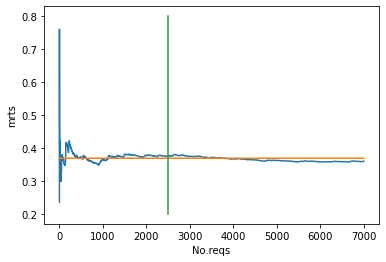

In [11]:
plt.plot(range(1,len(toPlot[:7000])+1), toPlot[:7000])
plt.plot(range(1,len(toPlot[:7000])+1), [0.369 for _ in range(len(toPlot[:7000]))]);
plt.plot([2500 for _ in arange(0.2, 0.8, 0.001)], arange(0.2, 0.8, 0.001));
plt.ylabel('mrts')
plt.xlabel('No.reqs');

## Results of d_value:

In [143]:
import math 

def getRes(fn):
    with open(fn) as f:
        mer = []
        for line in f:
            if len(mer) == 0:
                mer += [float(num) for num in line.rstrip()[1:-1].split(',')]
            elif not len(mer) == 0:
                mer = np.column_stack((mer, [float(num) for num in line.rstrip()[1:-1].split(',')]))
        print(mer)
    return mer

from scipy import stats
def cal_standard_devi(l, T):
    return math.sqrt(sum([(T-i)**2 for i in l])/(len(l)-1))

def cal_confidence_interval(l):
    alpha = 0.05
    n = len(l)
    T = sum(l)/len(l)
    s = cal_standard_devi(l, T)
    t = stats.t.ppf(1-alpha/2,n-1)
    return [round(T-(t*(s/math.sqrt(n))),4), round(T+(t*(s/math.sqrt(n))),4)]

In [144]:
v1mer = getRes('supp/d_value_test_results_v1.txt')
v2mer = getRes('supp/d_value_test_results_v2.txt')

[[0.4008 0.3724 0.3708 0.3712 0.3967 0.3726 0.3718 0.3832]
 [0.371  0.3765 0.3722 0.3737 0.3659 0.3855 0.3835 0.3721]
 [0.3805 0.3723 0.3657 0.3716 0.3807 0.3769 0.3715 0.375 ]
 [0.3744 0.3716 0.3877 0.3954 0.3781 0.3682 0.3755 0.3676]
 [0.3989 0.374  0.373  0.3713 0.3701 0.3748 0.3709 0.3761]
 [0.376  0.3986 0.3753 0.3831 0.3725 0.3919 0.3793 0.3738]
 [0.3681 0.371  0.3813 0.3791 0.3753 0.373  0.3739 0.3743]
 [0.3749 0.3768 0.375  0.3733 0.3725 0.3713 0.3768 0.3798]
 [0.3721 0.3916 0.3712 0.3851 0.3727 0.3658 0.3798 0.3717]
 [0.39   0.3799 0.3946 0.3851 0.4022 0.3937 0.3974 0.401 ]
 [0.3903 0.3957 0.3903 0.4012 0.3883 0.3853 0.3889 0.3844]
 [0.3925 0.3923 0.3869 0.3844 0.4061 0.389  0.3936 0.3894]
 [0.3976 0.3877 0.3922 0.3899 0.3952 0.3842 0.3966 0.3868]
 [0.3886 0.3925 0.3903 0.3888 0.4049 0.3811 0.3818 0.3868]
 [0.3892 0.3847 0.3984 0.3911 0.3951 0.3993 0.3874 0.396 ]
 [0.3911 0.3889 0.3915 0.3864 0.3911 0.3947 0.3953 0.3953]
 [0.3915 0.3826 0.3907 0.4012 0.383  0.3931 0.3868 0.396

In [145]:
confidence_intervals = [cal_confidence_interval(l) for l in v2mer]
confidence_intervals

[[0.3884, 0.3949],
 [0.3849, 0.3977],
 [0.3855, 0.3991],
 [0.3895, 0.4031],
 [0.3816, 0.3891],
 [0.3883, 0.3966],
 [0.401, 0.4089],
 [0.3973, 0.404],
 [0.3965, 0.4029],
 [0.3982, 0.4105],
 [0.4001, 0.4089],
 [0.3988, 0.4141],
 [0.3997, 0.4096],
 [0.4153, 0.4223],
 [0.4104, 0.4217],
 [0.4036, 0.4179],
 [0.4088, 0.4157],
 [0.41, 0.4158],
 [0.4067, 0.4168]]

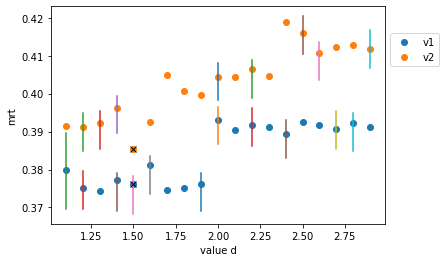

In [146]:

mv1 = [round(sum(i)/8,4) for i in v1mer]
mv2 = [round(sum(i)/8,4) for i in v2mer]

plt.plot(arange(1.1, 3, 0.1), mv1,'o');
plt.plot(arange(1.1, 3, 0.1), mv2,'o');
plt.legend(["v1", "v2"], loc='center left', bbox_to_anchor=(1, 0.8))



confidence_intervalsv1 = [cal_confidence_interval(l) for l in v1mer]
for i in range(len(arange(1.1, 3, 0.1))):
    v = arange(1.1, 3, 0.1)[i]
    plt.plot([v for _ in arange(confidence_intervalsv1[i][0], confidence_intervalsv1[i][1], 0.01)], arange(confidence_intervalsv1[i][0], confidence_intervalsv1[i][1], 0.01));

confidence_intervalsv2 = [cal_confidence_interval(l) for l in v2mer]
for i in range(len(arange(1.1, 3, 0.1))):
    v = arange(1.1, 3, 0.1)[i]
    plt.plot([v for _ in arange(confidence_intervalsv2[i][0], confidence_intervalsv2[i][1], 0.01)], arange(confidence_intervalsv2[i][0], confidence_intervalsv2[i][1], 0.01));

    
plt.plot([1.5], [mv1[4]],"x",color='black');
plt.plot([1.5], [mv2[4]],"x",color='black');
plt.ylabel('mrt')
plt.xlabel('value d');

## compare 2 versions

In [147]:
v1mrts = getRes('supp/compare_versions_mrtv1.txt')
v2mrts = getRes('supp/compare_versions_mrtv2.txt')

[0.3778, 0.3803, 0.3854, 0.376, 0.3778, 0.3692, 0.3814, 0.3696, 0.3747, 0.3771, 0.3755, 0.3752, 0.3827, 0.3711, 0.3694, 0.3714, 0.373, 0.372, 0.3692, 0.3831]
[0.3915, 0.3959, 0.4006, 0.3903, 0.3926, 0.3818, 0.3922, 0.3824, 0.3881, 0.3899, 0.3891, 0.3878, 0.3975, 0.3824, 0.3834, 0.384, 0.3868, 0.3858, 0.382, 0.397]


In [148]:
subs = np.subtract(v2mrts, v1mrts) 
subs

array([0.0137, 0.0156, 0.0152, 0.0143, 0.0148, 0.0126, 0.0108, 0.0128,
       0.0134, 0.0128, 0.0136, 0.0126, 0.0148, 0.0113, 0.014 , 0.0126,
       0.0138, 0.0138, 0.0128, 0.0139])

In [150]:
cal_confidence_interval(subs)

[0.0129, 0.014]

In [151]:
ci1 = cal_confidence_interval(v1mrts)

In [152]:
ci2 = cal_confidence_interval(v2mrts)

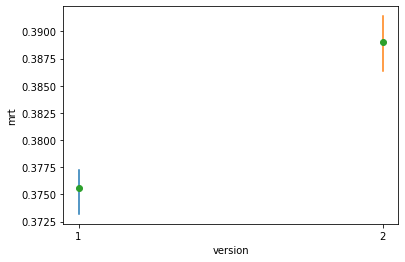

In [153]:
plt.plot([1 for _ in arange(ci1[0], ci1[1], 0.001)], arange(ci1[0], ci1[1], 0.001))
plt.plot([2 for _ in arange(ci2[0], ci2[1], 0.001)], arange(ci2[0], ci2[1], 0.001))
plt.xticks([1,2],[1,2])
plt.plot([1,2], [sum(v1mrts) / len(v1mrts),sum(v2mrts) / len(v2mrts)],'o');
plt.ylabel('mrt')
plt.xlabel('version');